In [1]:

# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import rcParams
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow.contrib import rnn
from sklearn import metrics

import pickle
from tensorflow.python.tools import freeze_graph

print(tf.__version__)


1.13.1


In [2]:
# for graphs
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8

columns = ['user', 'activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('data/combined_data.csv', header=None, names=columns)
# df_train = pd.read_csv('data/train.csv', header=None, names=columns)
# df_test = pd.read_csv('data/test.csv', header=None, names=columns)
print('Data loaded.')


Data loaded.


In [3]:
# data check
df.head()


,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Walking,49394992294000,0.844462,8.008764,2.792171
1,33,Walking,49395102310000,1.116869,8.621680,3.786457
2,33,Walking,49395202316000,-0.503953,16.657684,1.307553
3,33,Walking,49395302292000,4.794363,10.760075,-1.184970
4,33,Walking,49395412338000,-0.040861,9.234595,-0.694638


In [4]:
print(df['activity'].value_counts())


Walking       18058
Jogging       10118
Fall           6121
Upstairs       6020
Downstairs     4591
Standing       4048
Sitting        2534
Name: activity, dtype: int64


In [5]:
df.tail()


,user,activity,timestamp,x-axis,y-axis,z-axis
51485,99,Fall,0,0.532805,0.982090,-0.182023
51486,99,Fall,0,0.445601,0.981108,-0.227959
51487,99,Fall,0,0.334323,0.982336,-0.178093
51488,99,Fall,0,0.118892,1.022131,-0.134859
51489,99,Fall,0,-0.009580,1.035887,-0.241469


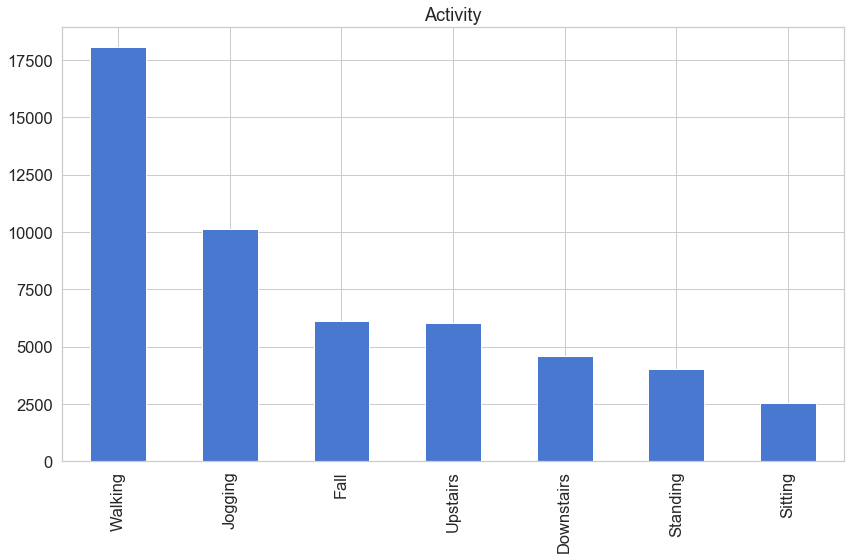

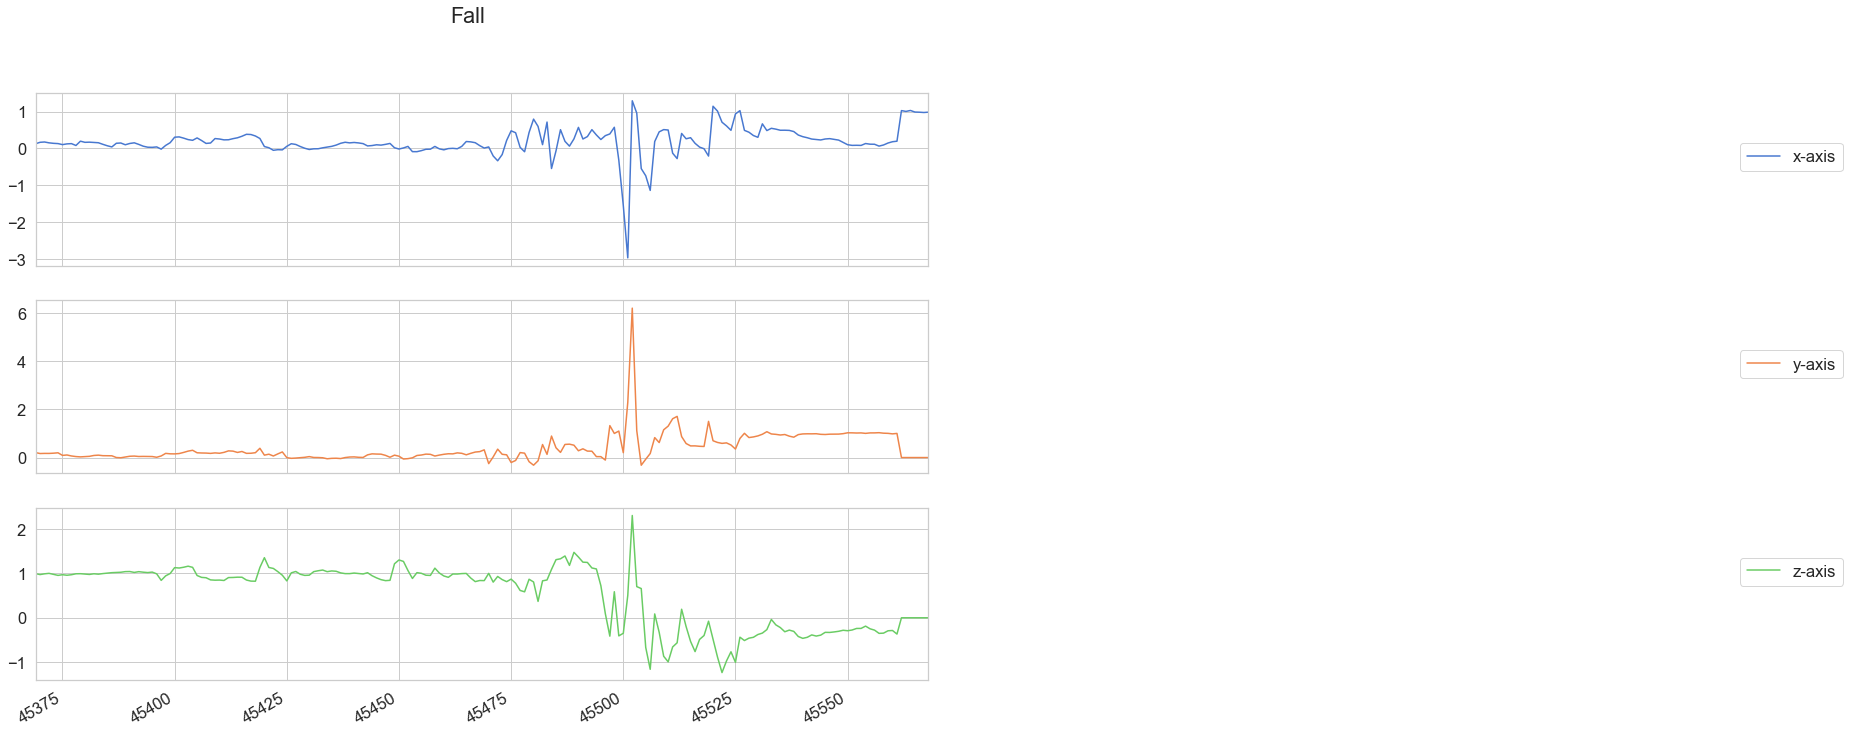

In [6]:

df['activity'].value_counts().plot(kind='bar', title='Activity')


def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.9, 0.5))


plot_activity("Fall", df)


In [7]:


# # %%
# # data check
# df_train.head()
# df_test.head()

# print(df_train.shape)
# print(df_test.shape)

# df_train['activity'].value_counts().plot(kind='bar', title='Activity')
# df_test['activity'].value_counts().plot(kind='bar', title='Activity')


# def plot_activity(activity, df):
#     data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:200]
#     axis = data.plot(subplots=True, figsize=(16, 12), title=activity)
#     for ax in axis:
#         ax.legend(loc='lower left', bbox_to_anchor=(1.9, 0.5))


# plot_activity("fall", df_train)
# plot_activity("not fall", df_train)

# plot_activity("fall", df_test)
# plot_activity("not fall", df_test)


In [8]:
# Data pre-processing
N_TIME_STEPS = 200
N_FEATURES = 3
step = 10
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)


In [9]:
# Data check
np.array(segments).shape


(5129, 3, 200)

In [10]:
# Reshape to stated by converting to array
reshaped_segments = np.asarray(
    segments, dtype=np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype=np.float32)


# # %%
# # TRAIN Data pre-processing
# N_TIME_STEPS = 200
# N_FEATURES = 3
# step = 1
# segments = []
# labels = []
# for i in range(0, len(df_train) - N_TIME_STEPS, step):
#     xs = df_train['x-axis'].values[i: i + N_TIME_STEPS]
#     ys = df_train['y-axis'].values[i: i + N_TIME_STEPS]
#     zs = df_train['z-axis'].values[i: i + N_TIME_STEPS]
#     label = stats.mode(df_train['activity'][i: i + N_TIME_STEPS])[0][0]
#     segments.append([xs, ys, zs])
#     labels.append(label)

# # %%
# # Data check
# np.array(segments).shape

# # %%
# # Reshape to stated by converting to array
# reshaped_segments = np.asarray(
#     segments, dtype=np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
# labels = np.asarray(pd.get_dummies(labels), dtype=np.float32)
# X_train = reshaped_segments
# y_train = labels

# print(X_train)
# print(y_train)

# # %%
# # TEST Data pre-processing
# N_TIME_STEPS = 200
# N_FEATURES = 3
# step = 1
# segments = []
# labels = []
# for i in range(0, len(df_test) - N_TIME_STEPS, step):
#     xs = df_test['x-axis'].values[i: i + N_TIME_STEPS]
#     ys = df_test['y-axis'].values[i: i + N_TIME_STEPS]
#     zs = df_test['z-axis'].values[i: i + N_TIME_STEPS]
#     label = stats.mode(df_test['activity'][i: i + N_TIME_STEPS])[0][0]
#     segments.append([xs, ys, zs])
#     labels.append(label)

# # %%
# # Reshape to stated by converting to array
# reshaped_segments = np.asarray(
#     segments, dtype=np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
# labels = np.asarray(pd.get_dummies(labels), dtype=np.float32)
# X_test = reshaped_segments
# y_test = labels

# print(X_test)
# print(y_test)


In [11]:
reshaped_segments.shape

(5129, 200, 3)

In [12]:
labels[0]


array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:

# Splitting data to 80 | 20
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED
)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


4103
1026
4103
1026


In [14]:
# Creating the LSTM model
N_CLASSES = 7
N_HIDDEN_UNITS = 64


def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }

    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(
        N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(
        lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output'] + biases['output'])


print('LSTM model defined.')



LSTM model defined.


In [15]:
# placeholder for the Model
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])


In [16]:
# using inputs
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")
print('LSTM model created.')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
LSTM model created.


In [17]:
# using l2 regularization
# L2_LOSS = 0.0015
L2_LOSS = 0.005

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=pred_Y, labels=Y))



In [18]:
# optimizer
# LEARNING_RATE = 0.0025
LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))



In [19]:

# training
N_EPOCHS = 50
BATCH_SIZE = 1024
saver = tf.train.Saver()

history = dict(train_loss=[],
               train_acc=[],
               test_loss=[],
               test_acc=[])

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1, BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
        X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
        X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 10 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')

predictions, acc_final, loss_final = sess.run(
    [pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')

epoch: 1 test accuracy: 0.6111111044883728 loss: 1.289669394493103
epoch: 10 test accuracy: 0.9220272898674011 loss: 0.2271963208913803
epoch: 20 test accuracy: 0.9697855710983276 loss: 0.08660295605659485
epoch: 30 test accuracy: 0.9697855710983276 loss: 0.08332085609436035
epoch: 40 test accuracy: 0.9795321822166443 loss: 0.06615686416625977
epoch: 50 test accuracy: 0.9766082167625427 loss: 0.06434309482574463

final results: accuracy: 0.9766082167625427 loss: 0.06434309482574463


In [20]:

# loading model to disk
pickle.dump(predictions, open("predictions.p", "wb"))
pickle.dump(history, open("history.p", "wb"))
tf.train.write_graph(sess.graph_def, '.' '/checkpoint/my-model', 'train.pbtxt')
saver.save(sess, save_path="./checkpoint/my-model.ckpt")




'./checkpoint/my-model.ckpt'

In [21]:
sess.close()


In [22]:

# reloading model
history = pickle.load(open("history.p", "rb"))
predictions = pickle.load(open("predictions.p", "rb"))


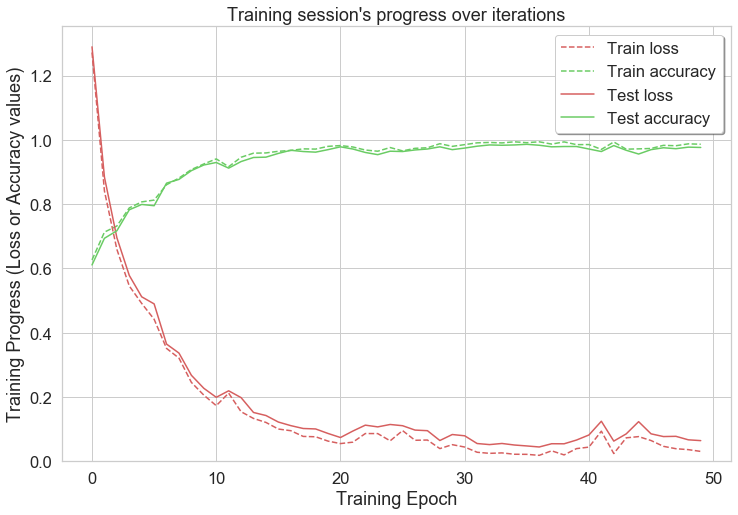

In [23]:

# evaluation
plt.figure(figsize=(12, 8))
plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")
plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.show()


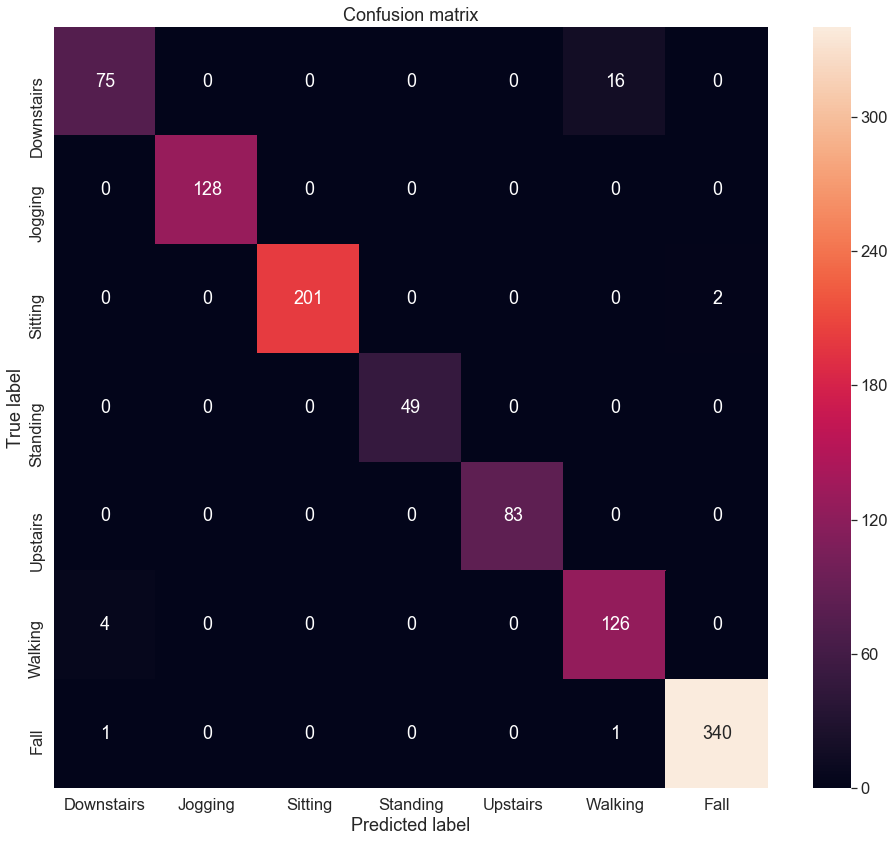

In [24]:

# confusion matrix
LABELS = ['Downstairs', 'Jogging', 'Sitting',
          'Standing', 'Upstairs', 'Walking', 'Fall']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [25]:

# exporting model

MODEL_NAME = 'my-model'

input_graph_path = 'checkpoint/my-model/train.pbtxt'
checkpoint_path = './checkpoint/' + MODEL_NAME+'.ckpt'
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_frozen_graph_name = 'frozen_'+MODEL_NAME+'.pb'

freeze_graph.freeze_graph(input_graph_path, input_saver="",
                          input_binary=False, input_checkpoint=checkpoint_path,
                          output_node_names="y_", restore_op_name="save/restore_all",
                          filename_tensor_name="save/Const:0",
                          output_graph=output_frozen_graph_name, clear_devices=True, initializer_nodes="")



Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./checkpoint/my-model.ckpt
Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.
